# 1. Import Libraries

In [9]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# 2. Load Reddit Data

In [10]:
# Update the path if the file is in a different folder
reddit_df = pd.read_csv('../data/reddit_bitcoin_cleaned.csv')
reddit_df.head()


,title,text,score,date,clean_text
0,100$ per‌ day stra‌tegy I use‌,"Hi, friends! Today I want to share a strategy ...",16,1.749743e+09,hi friends today i want to share a strategy fr...
1,Fear and greed index,Whats your opinions on the fear and greed inde...,1,1.749743e+09,whats your opinions on the fear and greed inde...
2,"""Cause your dollar ain't shit and it's taxed t...",Oliver Anthony poetically describing the probl...,2,1.749742e+09,oliver anthony poetically describing the probl...
3,This sub upvoted a fake story / ad,A somewhat obvious fake story about someone's ...,11,1.749741e+09,a somewhat obvious fake story about someones d...
4,"""I Had $50,000 Saved and Was Still Broke - Her...","""Confession: I thought I was financially respo...",46,1.749739e+09,confession i thought i was financially respons...


 # 3. Apply VADER Sentiment Scoring

In [11]:
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on the 'title' column
reddit_df['sentiment'] = reddit_df['title'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])


#  4. Convert created_utc to Date & Aggregate Daily Sentiment

In [12]:
print(reddit_df.columns.tolist())


['title', 'text', 'score', 'date', 'clean_text', 'sentiment']


In [15]:
# Ensure date column is in datetime format (update column name if needed)
reddit_df['date'] = pd.to_datetime(reddit_df['date']).dt.date

# Aggregate average daily sentiment
daily_sentiment = reddit_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['Date', 'Avg_Sentiment']


# 5. Plot Daily Sentiment

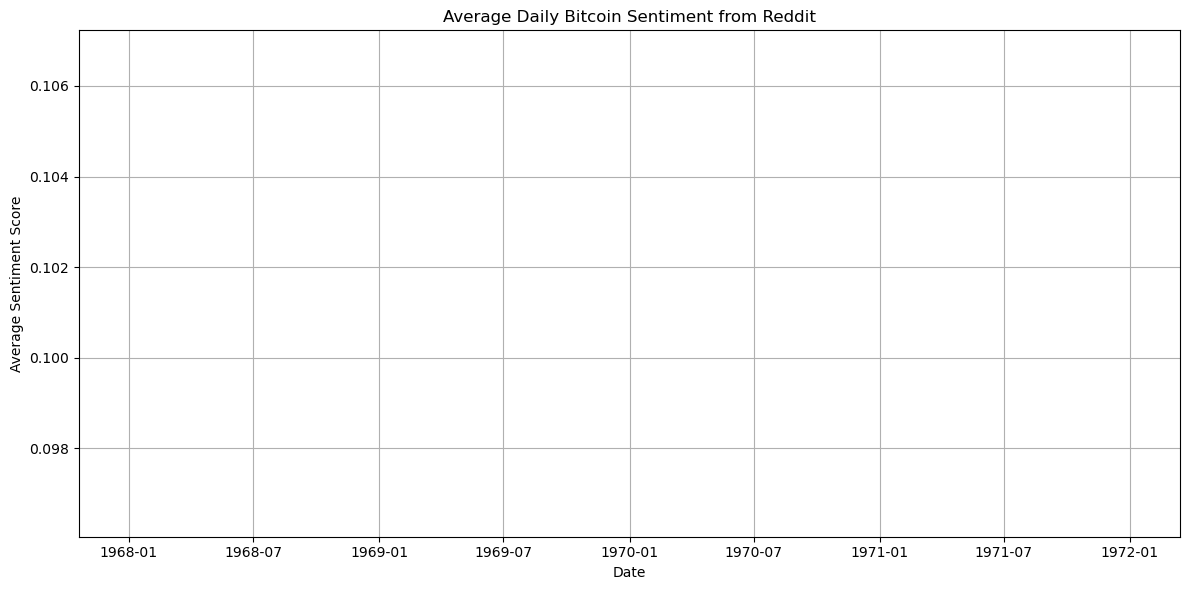

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sentiment, x='Date', y='Avg_Sentiment', color='purple')
plt.title('Average Daily Bitcoin Sentiment from Reddit')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()


# 6. Re-load and prep BTC data here

In [20]:
import pandas as pd
import numpy as np

# Load BTC price data
btc_df = pd.read_csv('../data/btc_price.csv', skiprows=2)
btc_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df.set_index('Date', inplace=True)

# Convert to numeric
btc_df['Close'] = pd.to_numeric(btc_df['Close'], errors='coerce')
btc_df['Returns'] = np.log(btc_df['Close'] / btc_df['Close'].shift(1))

# Drop NaN
btc_df.dropna(inplace=True)


# 7.Merge Daily Sentiment with Volatility

In [24]:
daily_sentiment.columns
daily_sentiment.rename(columns={'Date': 'date'}, inplace=True)

merged_df = pd.merge(daily_sentiment, btc_returns, on='date', how='inner')
merged_df.dropna(inplace=True)
merged_df.head()



,date,Avg_Sentiment,volatility


# 8.Visualize the Relationship

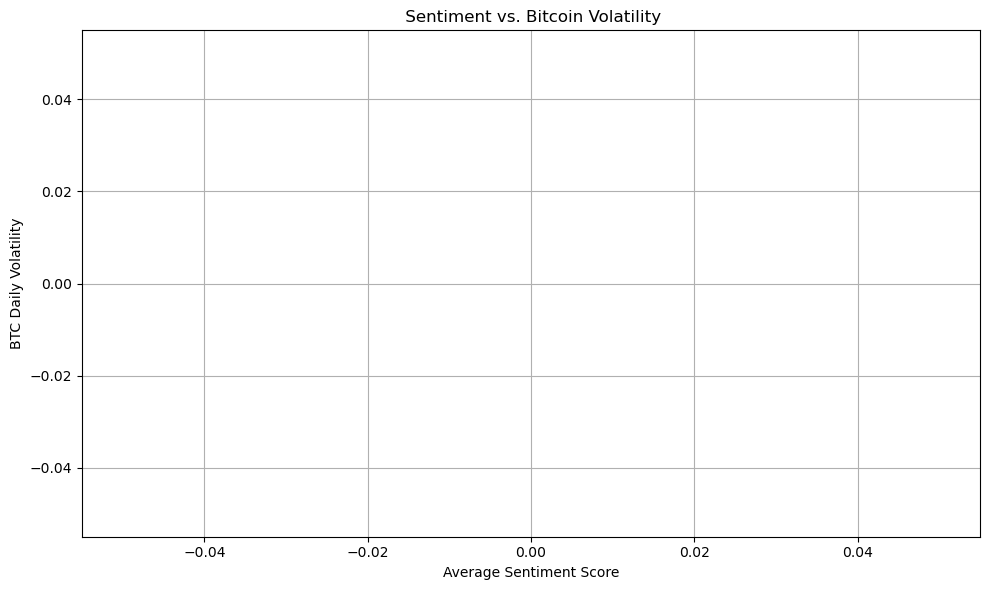

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Avg_Sentiment', y='volatility')
plt.title(" Sentiment vs. Bitcoin Volatility")
plt.xlabel("Average Sentiment Score")
plt.ylabel("BTC Daily Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()


# 9.Run a Linear Regression (OLS)

In [27]:
merged_df.shape
merged_df.head()


,date,Avg_Sentiment,volatility


In [28]:
print("Sentiment date range:", daily_sentiment['date'].min(), "to", daily_sentiment['date'].max())
print("BTC return date range:", btc_returns['date'].min(), "to", btc_returns['date'].max())


Sentiment date range: 1970-01-01 to 1970-01-01
BTC return date range: 2022-01-02 to 2024-12-30


In [ ]:
reddit_df = pd.read_csv('../data/reddit_bitcoin_cleaned.csv')


In [36]:
import os
print(os.getcwd())


c:\Users\dell\crypto-price-volatility\Crypto-price-volatility-1\notebooks


In [37]:
print(reddit_df.columns)
reddit_df.head(2)


Index(['title', 'text', 'score', 'date', 'clean_text'], dtype='object')


,title,text,score,date,clean_text
0,100$ per‌ day stra‌tegy I use‌,"Hi, friends! Today I want to share a strategy ...",16,1.749743e+09,hi friends today i want to share a strategy fr...
1,Fear and greed index,Whats your opinions on the fear and greed inde...,1,1.749743e+09,whats your opinions on the fear and greed inde...


# sentiment 

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

In [40]:
# Drop rows where clean_text is NaN
reddit_df = reddit_df.dropna(subset=['clean_text'])

# Now apply sentiment analysis safely
reddit_df['sentiment'] = reddit_df['clean_text'].apply(
    lambda x: analyzer.polarity_scores(str(x))['compound']
)


In [41]:
reddit_df['date'] = pd.to_datetime(reddit_df['date'], unit='s')
reddit_df['date'] = reddit_df['date'].dt.date  # Just keep the date part


In [42]:
daily_sentiment = reddit_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['date', 'Avg_Sentiment']
daily_sentiment.head()


,date,Avg_Sentiment
0,2025-06-11,0.296745
1,2025-06-12,0.278892


In [ ]:
# Convert the 'date' column (which looks like a UNIX timestamp) to datetime
reddit_df['date'] = pd.to_datetime(reddit_df['date']).dt.date


In [46]:
# Step 4: Aggregate average daily sentiment
daily_sentiment = reddit_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['date', 'Avg_Sentiment']

# Preview the output
daily_sentiment.head()


,date,Avg_Sentiment
0,2025-06-11,0.296745
1,2025-06-12,0.278892


# 10.Compute daily BTC volatility and merge with sentiment

In [51]:
# 1. Compute daily BTC volatility (standard deviation of returns)
btc_df['date'] = btc_df.index.date
btc_returns = btc_df.groupby('date')['Returns'].std().reset_index()
btc_returns.columns = ['date', 'volatility']

# 2. Make sure reddit_df['date'] is datetime.date
reddit_df['date'] = pd.to_datetime(reddit_df['date']).dt.date

# 3. Compute average daily sentiment
daily_sentiment = reddit_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['date', 'Avg_Sentiment']

# 4. Merge datasets
merged_df = pd.merge(daily_sentiment, btc_returns, on='date', how='inner')
merged_df.dropna(inplace=True)

# 5. Show merged data
merged_df.head()



,date,Avg_Sentiment,volatility


# checkings 

In [49]:
btc_df = pd.read_csv('../data/btc_price.csv')  # Adjust path if needed
print(btc_df.columns)
btc_df.head()


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,47686.8125,47827.3125,46288.484375,46311.74609375,24582667004
3,2022-01-02,47345.21875,47881.40625,46856.9375,47680.92578125,27951569547
4,2022-01-03,46458.1171875,47510.7265625,45835.96484375,47343.54296875,33071628362


In [50]:
btc_df = pd.read_csv('../data/btc_price.csv', skiprows=2)
btc_df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']  # rename for clarity
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df.set_index('Date', inplace=True)
btc_df['Returns'] = btc_df['Close'].pct_change()
btc_df.head()


,Close,High,Low,Open,Volume,Returns
Date,,,,,,
2022-01-01,47686.812500,47827.312500,46288.484375,46311.746094,24582667004,NaN
2022-01-02,47345.218750,47881.406250,46856.937500,47680.925781,27951569547,-0.007163
2022-01-03,46458.117188,47510.726562,45835.964844,47343.542969,33071628362,-0.018737
2022-01-04,45897.574219,47406.546875,45752.464844,46458.851562,42494677905,-0.012066
2022-01-05,43569.003906,46929.046875,42798.222656,45899.359375,36851084859,-0.050734


# checkings 

In [52]:
print("Reddit sentiment date range:", reddit_df['date'].min(), "to", reddit_df['date'].max())
print("BTC price date range:", btc_returns['date'].min(), "to", btc_returns['date'].max())


Reddit sentiment date range: 2025-06-11 to 2025-06-12
BTC price date range: 2022-01-01 to 2024-12-30


In [54]:
reddit_df['date'] = pd.to_datetime(reddit_df['date']).dt.date


In [55]:
# Group sentiment again
daily_sentiment = reddit_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['date', 'Avg_Sentiment']

# Merge again
merged_df = pd.merge(daily_sentiment, btc_returns, on='date', how='inner')
merged_df.dropna(inplace=True)
merged_df.head()


,date,Avg_Sentiment,volatility
